In [8]:
'''
5.2　在小型数据集上从头开始训练一个卷积神经网络
'''

'''
5.2.2 数据集的准备
'''
import os,shutil

original_dataset_dir=os.path.join('D:','dogs_vs_cats','train')# 原始数据集解压目录的路径
base_dir=os.path.join('D:','dogs_vs_cats','cats_and_dogs_small')# 保存较小数据集的目录
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')# 训练
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')# 验证
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')# 测试
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')# 猫的训练图像目录
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')# 狗的训练图像目录
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')# 猫的验证图像目录
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# 狗的验证图像目录
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')# 猫的测试图像目录
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')# 狗的测试图像目录
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]# 将前 1000 张猫的图像复制到 train_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]# 将接下来 500 张猫的图像复制到 validation_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]# 将接下来的 500 张猫的图像复制到 test_cats_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]# 将前 1000 张狗的图像复制到 train_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]# 将接下来 500 张狗的图像复制到 validation_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]# 将接下来 500 张狗的图像复制到 test_dogs_dir
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [10]:
'''
5.2.3 构建网络
'''
# 是 Conv2D 层和 MaxPooling2D 层的堆叠。

from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()# 目前神经网络的架构

Using TensorFlow backend.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)     

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
'''
5.2.4 数据预处理
'''
# 使用 ImageDataGenerator 从目录中读取图像
'''
(1) 读取图像文件。
(2) 将 JPEG 文件解码为 RGB 像素网格。
(3) 将这些像素网格转换为浮点数张量。
(4) 将像素值（0~255 范围内）缩放到 [0, 1] 区间（神经网络喜欢处理较小的输入值）。
Keras 拥有自动完成这些步骤的工具。一个图像处理辅助工具的模块，位于 keras.preprocessing.image 。
它包含ImageDataGenerator 类，可以快速创建 Python 生成器，
能够将硬盘上的图像文件自动转换为预处理好的张量批量。
'''
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)# 将所有图像乘以 1/255 缩放
test_datagen = ImageDataGenerator(rescale=1./255)

# 将所有图像的大小调整为 150×150
# 因为使用了 binary_crossentropy损失，所以需要用二进制标签
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

# 问题？？？
# python生成器是什么？

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
print(train_generator)

In [19]:
# 利用批量生成器拟合模型
# 使用 fit_generator 方法来拟合，它在数据生成器上的效果和 fit 相同。model.fit(train_images, train_labels, epochs=5,batch_size=64)
# ？？？
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
# 保存模型
model.save('cats_and_dogs_small_1.h5')


Epoch 1/30
100/100 [==============================] - 42s 424ms/step - loss: 0.6921 - acc: 0.5215 - val_loss: 0.6657 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 41s 407ms/step - loss: 0.6627 - acc: 0.6065 - val_loss: 0.6649 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 42s 415ms/step - loss: 0.6154 - acc: 0.6765 - val_loss: 0.8321 - val_acc: 0.6140
Epoch 4/30
100/100 [==============================] - 42s 417ms/step - loss: 0.5720 - acc: 0.7015 - val_loss: 0.4263 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 42s 424ms/step - loss: 0.5360 - acc: 0.7305 - val_loss: 0.5621 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 43s 431ms/step - loss: 0.5060 - acc: 0.7505 - val_loss: 0.5883 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 43s 431ms/step - loss: 0.4772 - acc: 0.7690 - val_loss: 0.5854 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 

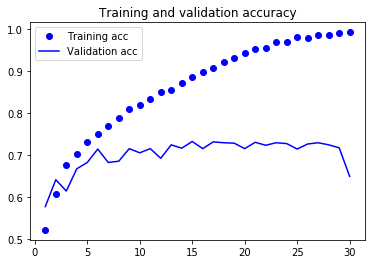

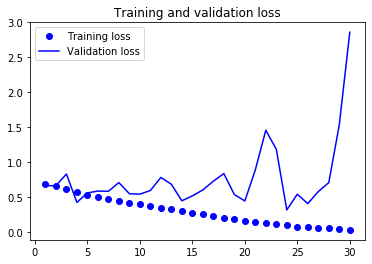

In [22]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
'''
5.2.5　使用数据增强
'''

# 有严重的过度拟合，将使用一种针对于计算机视觉领域的新方法---数据增强解决这一问题
# 数据增强是从现有的训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加（augment）样本。
# 利用 ImageDataGenerator 来设置数据增强
datagen = ImageDataGenerator(
rotation_range=40,# rotation_range 是角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
width_shift_range=0.2,# width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽度或总高度的比例）
height_shift_range=0.2,
shear_range=0.2,#  shear_range 是随机错切变换的角度
zoom_range=0.2,#  zoom_range 是图像随机缩放的范围
horizontal_flip=True,#  horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真实世界的图像），这种做法是有意义的。
fill_mode='nearest')#  fill_mode 是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移。

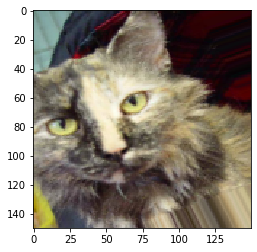

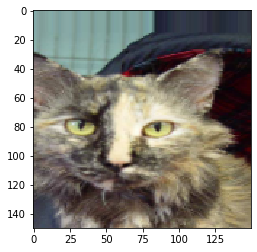

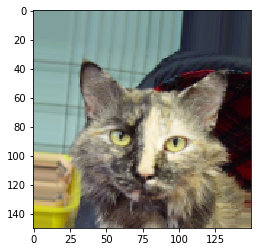

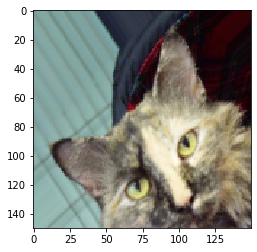

In [31]:
# 显示几个随机增强后的训练图像
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[2]# 选择一张图像进行增强
img = image.load_img(img_path, target_size=(150, 150))# 读取图像并调整大小
x = image.img_to_array(img)# 将其转换为形状 (150, 150, 3) 的 Numpy 数组
x = x.reshape((1,) + x.shape)# 将其形状改变为 (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):# 生成随机变换后的图像批量。循环是无限的，因此需要在某个时刻终止循环
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [32]:
# 定义一个使用数据增强并且包含 dropout 的新卷积神经网络
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [33]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
zoom_range=0.2,horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)# 注意，不能增强验证数据

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 76s 760ms/step - loss: 0.6945 - acc: 0.5063 - val_loss: 0.6672 - val_acc: 0.4956
Epoch 2/100
100/100 [==============================] - 79s 793ms/step - loss: 0.6779 - acc: 0.5612 - val_loss: 0.6816 - val_acc: 0.5155
Epoch 3/100
100/100 [==============================] - 75s 754ms/step - loss: 0.6664 - acc: 0.5868 - val_loss: 0.5907 - val_acc: 0.6091
Epoch 4/100
100/100 [==============================] - 73s 735ms/step - loss: 0.6471 - acc: 0.6121 - val_loss: 0.6999 - val_acc: 0.5966
Epoch 5/100
100/100 [==============================] - 75s 745ms/step - loss: 0.6284 - acc: 0.6401 - val_loss: 0.5839 - val_acc: 0.6688
Epoch 6/100
100/100 [==============================] - 80s 802ms/step - loss: 0.6116 - acc: 0.6542 - val_loss: 0.5179 - val_acc: 0.6656
Epoch 7/100
100/100 [==============================] - 75s 745ms/step - loss: 0.6033 - acc: 0.6676 -

100/100 [==============================] - 73s 734ms/step - loss: 0.4070 - acc: 0.8112 - val_loss: 0.4452 - val_acc: 0.7912
Epoch 61/100
100/100 [==============================] - 78s 784ms/step - loss: 0.4051 - acc: 0.8071 - val_loss: 0.8883 - val_acc: 0.7455
Epoch 62/100
100/100 [==============================] - 79s 790ms/step - loss: 0.4176 - acc: 0.8078 - val_loss: 0.6544 - val_acc: 0.7792
Epoch 63/100
100/100 [==============================] - 73s 726ms/step - loss: 0.4019 - acc: 0.8160 - val_loss: 0.3366 - val_acc: 0.7854
Epoch 64/100
100/100 [==============================] - 74s 742ms/step - loss: 0.4054 - acc: 0.8084 - val_loss: 0.3548 - val_acc: 0.7945
Epoch 65/100
100/100 [==============================] - 74s 742ms/step - loss: 0.4195 - acc: 0.8125 - val_loss: 0.3251 - val_acc: 0.7843
Epoch 66/100
100/100 [==============================] - 73s 730ms/step - loss: 0.4007 - acc: 0.8160 - val_loss: 0.3416 - val_acc: 0.7977
Epoch 67/100
100/100 [==============================] 

In [34]:
# 保存模型
model.save('cats_and_dogs_small_2.h5')

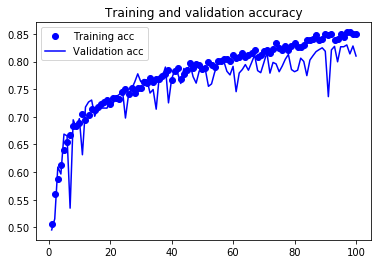

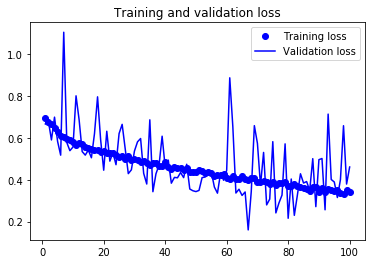

In [35]:
# 再一次绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
'''
5.3 使用预训练的卷积神经网络
'''
# 使用预训练网络有两种方法：特征提取（feature extraction）和微调模型（fine-tuning）

'''
5.3.1　特征提取
'''
# 是使用之前网络学到的表示来从新样本中提取出有趣的特征。然后将这些特征输入一个新的分类器，从头开始训练。
# 用于图像分类的卷积神经网络包含两部分：首先是一系列池化层和卷积层，最后是一个密集连接分类器。第一部分叫作模型的卷积基（convolutional base）。
# 保持卷积基不变，改变分类器

# 注意，某个卷积层提取的表示的通用性（以及可复用性）取决于该层在模型中的深度。模型中更靠近底部的层提取的是局部的、高度通用的特征图
#（比如视觉边缘、颜色和纹理），而更靠近顶部的层提取的是更加抽象的概念（比如“猫耳朵”或“狗眼睛”）。
# 因此，如果你的新数据集与原始模型训练的数据集有很大差异，那么最好只使用模型的前几层来做特征提取，而不是使用整个卷积基。



'\n5.3.1\u3000特征提取\n'

In [37]:
'''
5.3.1.1 不使用数据增强的快速特征提取
'''
# 在你的数据集上运行卷积基，将输出保存成硬盘中的 Numpy 数组，然后用这个数据作
# 为输入，输入到独立的密集连接分类器中（与本书第一部分介绍的分类器类似）。

# 将 VGG16 卷积基实例化
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',# weights 指定模型初始化的权重检查点
                  include_top=False,#  include_top 指定模型最后是否包含密集连接分类器。默认情况下，这个密集连接分
                                    # 类器对应于 ImageNet 的 1000 个类别。因为我们打算使用自己的密集连接分类器（只有
                                    # 两个类别： cat 和 dog ），所以不需要包含它。
                  input_shape=(150, 150, 3))#  input_shape 是输入到网络中的图像张量的形状。这个参数完全是可选的，如果不传
                                            # 入这个参数，那么网络能够处理任意形状的输入。


58892288/58889256 [==============================] - 126s 2us/step


In [38]:
# 使用预训练的卷积基提取特征
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir=os.path.join('D:','dogs_vs_cats','cats_and_dogs_small')# 保存较小数据集的目录
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))# VGG16 卷积基的详细架构，最后的特征图形状为 (4, 4, 512) 
                                                        # 我们将在这个特征上添加一个密集连接分类器。
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break# 注意，这些生成器在循环中不断生成数据，所以必须在读取完所有图像后终止循环
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
# 展平
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [40]:
# 定义并训练密集连接分类器
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6228 - acc: 0.6490 - val_loss: 0.4356 - val_acc: 0.8450
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4147 - acc: 0.8265 - val_loss: 0.3499 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3585 - acc: 0.8370 - val_loss: 0.3142 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.3071 - acc: 0.8750 - val_loss: 0.2916 - val_acc: 0.8900
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2813 - acc: 0.8890 - val_loss: 0.2774 - val_acc: 0.8950
Epoch 6/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2607 - acc: 0.8955 - val_loss: 0.2750 - val_acc: 0.8870
Epoch 7/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2475 - acc: 0.9020 - val_loss: 0.2617 - val_acc: 0.8950
Epoch 8/30
200

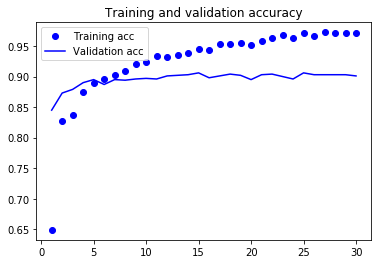

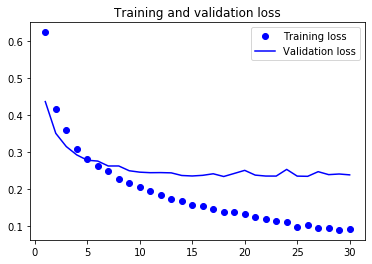

In [41]:
# 绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
'''
我们的验证精度达到了约 90%，比上一节从头开始训练的小型模型效果要好得多。但从图
中也可以看出，虽然 dropout 比率相当大，但模型几乎从一开始就过拟合。这是因为本方法没有
使用数据增强，而数据增强对防止小型图像数据集的过拟合非常重要。
'''

'\n我们的验证精度达到了约 90%，比上一节从头开始训练的小型模型效果要好得多。但从图\n中也可以看出，虽然 dropout 比率相当大，但模型几乎从一开始就过拟合。这是因为本方法没有\n使用数据增强，而数据增强对防止小型图像数据集的过拟合非常重要。\n'

In [43]:
'''
5.3.1.2 使用数据增强的特征提取
'''
# 本方法计算代价很高，只在有 GPU 的情况下才能尝试运行。它在 CPU 上是绝对难以运
# 行的。如果你无法在 GPU 上运行代码，那么就采用第一种方法。

'\n5.3.1.2 使用数据增强的特征提取\n'